In [1]:
import sys
sys.path.append('..')

In [2]:
from processor import BatchProcessor

video_dir = '/media/adeshkadambi/WD_BLACK/PhD/test_folder/'

processor = BatchProcessor(
    video_dir=video_dir,
    num_frames=4,
    model="llama3.2-vision:latest"
)

processor.load_progress()
processor.process_videos()

2024-11-10 20:36:47,826 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/pull "HTTP/1.1 200 OK"
2024-11-10 20:36:47,827 - processor - INFO - Found 6 new videos to process
2024-11-10 20:36:47,831 - processor - INFO - Progress: 0/6 (0.0%)
2024-11-10 20:36:58,078 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 20:37:05,907 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 20:37:13,441 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 20:37:20,097 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 20:37:20,098 - inference - INFO - Frame analysis completed.
2024-11-10 20:37:25,246 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 20:37:25,246 - inference - INFO - Context synthesis completed.
2024-11-10 20:37:32,416 - httpx - INFO - HTTP Request:

In [3]:
import json

with open(processor.results_path, 'r') as f:
    results = json.load(f)

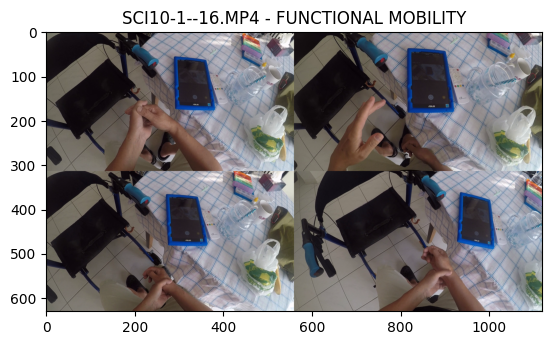

{'prediction': 'FUNCTIONAL MOBILITY', 'tags': ['mobility', 'transferring', 'balance'], 'reasoning': 'The person is observed to be moving around the room, sitting in a chair, and standing in the center of the room. This suggests that they are engaging in functional mobility activities such as walking, transferring from one place to another, and maintaining balance. In Frame 1, the person is seated in a chair facing away from the camera, which indicates that they may be resting or relaxing. However, in Frames 2-4, the person is observed to be moving around the room, which suggests that they are engaging in functional mobility activities.', 'intermediates': {'Environment_Analysis': 'The environment is a clinical or rehabilitation setting with white tiled floors and walls. A blue-and-white checkered tablecloth is present in three out of the four frames.', 'ADL_Comparison': "Functional mobility activities are observed in Frames 2-4, but not in Frame 1. The person's hand positions change bet

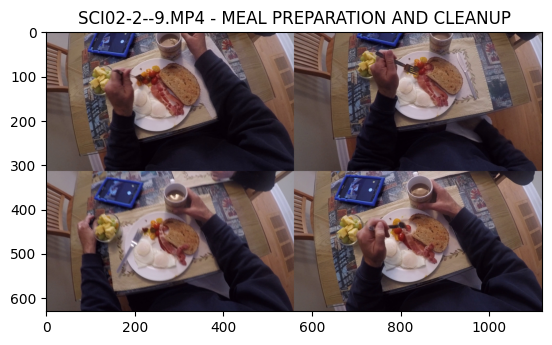

{'prediction': 'MEAL PREPARATION AND CLEANUP', 'tags': ['meal preparation', 'eating', 'coffee consumption'], 'reasoning': 'The person is seated at the table in all frames, and a blue tablet or tablet case is present in all frames. In Frame 2, a plate with food is visible, indicating meal preparation. In Frames 1, 2, and 4, a white mug filled with coffee or tea is present, suggesting that the person is engaging in meal-related activities. The bowl of fruit in Frame 4 also supports this classification.', 'intermediates': {'Environment_Analysis': 'The room appears to be a dining area or kitchen in all frames. A wooden table is present in all frames.', 'ADL_Comparison': 'Meal Preparation and Cleanup criteria met: presence of food, coffee mug, and plate; Changes between frames indicate meal preparation activities', 'OT_Discussion': 'Occupational therapists agree that the classification aligns with observed actions and environmental context.', 'Expert_Evaluation': 'Three occupational therapi

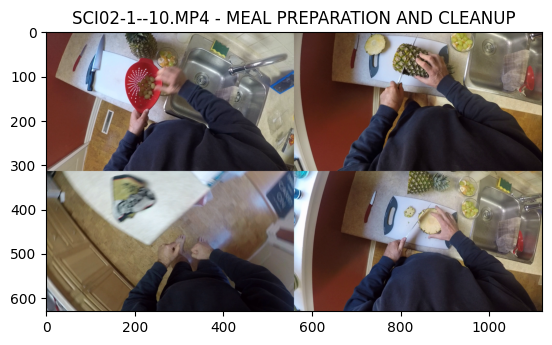

{'prediction': 'MEAL PREPARATION AND CLEANUP', 'tags': ['pineapple', 'bowl of fruit', 'sink', 'knife', 'colander'], 'reasoning': "The person is observed manipulating a pineapple, which suggests they are preparing food. The presence of a bowl containing fruit and the sink being empty also supports this classification. In frame 4, the person's right hand holds a piece of pineapple, indicating active manipulation. Additionally, the constant elements analysis shows that the pineapple and bowl of fruit are present in multiple frames, further supporting the meal preparation activity.", 'intermediates': {'Environment_Analysis': 'The environment is consistently a kitchen, with a white countertop and sink visible in multiple frames. The presence of a pineapple and bowl of fruit suggests meal preparation.', 'ADL_Comparison': 'Meal Preparation and Cleanup meets the criteria for this activity category: objects are being manipulated (pineapple), and there is evidence of food preparation (bowl of fr

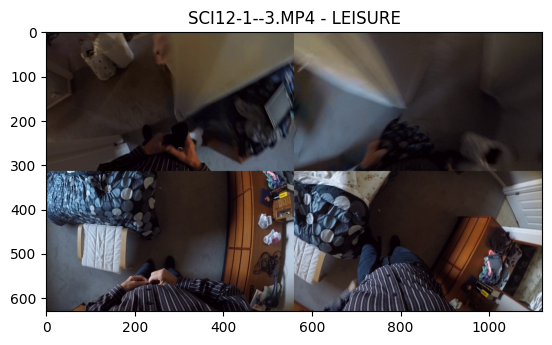

{'prediction': 'LEISURE', 'tags': ['holding black object', 'phone or remote control', 'leisure activity'], 'reasoning': "The person is holding a black object resembling a phone or remote control in their right hand, which suggests they are engaging in leisure activities such as watching TV or playing games. In Frame 1, the person is lying in bed, but there is no indication of any ADLs being performed. In Frame 2, the person is holding an object with their right hand extended towards the ceiling, but it's unclear what activity this is related to. However, in Frame 4, the person is standing in front of the dresser and holding a black object that resembles a phone or remote control, which strongly suggests leisure activities.", 'intermediates': {'Environment_Analysis': "The room appears to be a bedroom or living area with furniture such as beds, nightstands, dressers, bookshelves, chairs, and decorative items. The person's position changes across frames, but there is no clear indication o

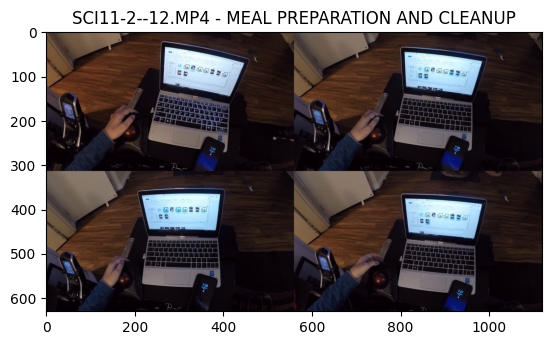

{'prediction': 'MEAL PREPARATION AND CLEANUP', 'tags': ['laptop', 'smartphone', 'cell phone', 'video editing software', 'recipe', 'cooking instructions'], 'reasoning': 'The person is observed to be sitting at a desk, facing away from the viewer, with their left hand resting on the desk near the laptop keyboard. The laptop computer is open and turned on, displaying a video editing software interface. This suggests that the person is engaged in meal preparation, as they are using a laptop to access a recipe or cooking instructions. Additionally, the presence of a smartphone or cell phone next to the laptop implies that the person may be checking recipes or watching cooking videos online.', 'intermediates': {'Environment_Analysis': 'The room appears to be a home or office setting with wood floors. A table or desk is present in each frame, holding various objects.', 'ADL_Comparison': 'The criteria for MEAL PREPARATION AND CLEANUP are met as the person is observed to be engaged in meal prep

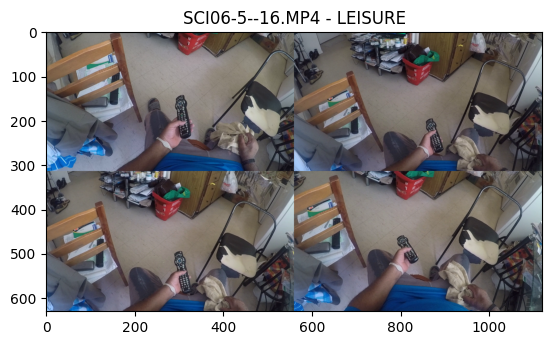

{'prediction': 'LEISURE', 'tags': ['Leisure', 'Watching TV', 'Remote Control'], 'reasoning': 'The person is sitting on the floor or chair, facing away from the viewer, and holding a remote control. This suggests they are engaged in leisure activity such as watching TV. The presence of various objects scattered around the room does not indicate any specific ADL being performed.', 'intermediates': {'Environment_Analysis': 'The room appears to be cluttered with various items scattered around. A wooden chair or table is visible in the top-left corner of the image.', 'ADL_Comparison': 'The criteria for LEISURE are met as the person is engaged in a leisure activity (watching TV). The other categories do not fit as there is no indication of feeding, functional mobility, grooming and health management, communication management, home management, or meal preparation and cleanup.', 'OT_Discussion': "Occupational therapists agree that the person's actions are consistent with leisure activities. Th

In [5]:
import os

from PIL import Image
from matplotlib import pyplot as plt

grids_path = os.path.join(processor.batch_dir, 'grids')

for video_name, video_results in results.items():
    pred = video_results['prediction']
    reasoning = video_results['reasoning']
    tags = video_results['tags']
    grid = os.path.join(grids_path, video_name.replace('.MP4', '_grid.png'))

    plt.imshow(Image.open(grid))
    plt.title(f'{video_name} - {pred}')
    plt.show()

    print(video_results)